penalty_array  [12100, 12300, 12200, 12200, 12100, 12200, 12200, 12000, 12200, 12200, 12100, 12300, 12100, 12100, 12100, 12200, 12100, 11800, 12200, 11900, 12300, 12300, 11900, 12200, 11900, 12200, 12100, 12300, 12300, 12100, 12000, 11700, 12200, 12000, 12100, 11900, 12000, 12200, 12200, 12300, 12300, 12100, 11800, 12100, 12200, 12100, 12300, 12300, 12300, 12300, 12000, 12200, 12300, 12300, 12100, 12300, 12300, 12200, 12100, 12200, 12200, 12200, 12200, 12100, 11700, 12200, 12000, 12200, 12300, 12300, 12100, 12000, 12100, 12100, 12100, 12300, 12200, 12100, 12100, 12000, 11900, 11900, 11900, 12300, 12300, 12000, 12200, 12000, 12200, 12200, 11900, 12200, 12100, 12200, 12100, 12100, 12200, 12100, 12300, 12000, 12300, 12100, 12200, 12000, 12300, 11800, 12100, 12100, 11900, 11900, 12200, 12000, 12200, 12100, 11900, 12200, 12000, 12200, 11700, 12200, 12000, 12300, 12300, 12200, 12100, 12100, 12300, 12100, 12100, 12200, 12200, 12200, 12100, 12200, 12000, 12200, 12200, 12000, 12000, 11900, 1180

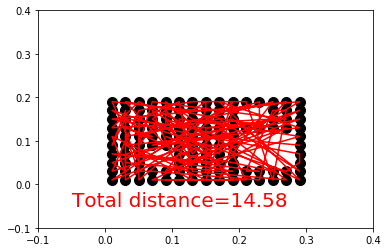

penalty_array  [12200, 12100, 12300, 11900, 12200, 12200, 12200, 12300, 12100, 12100, 12100, 12000, 12300, 12000, 12200, 12300, 12100, 12200, 12000, 12100, 12300, 12200, 12200, 12200, 12200, 12000, 12300, 12200, 12100, 12100, 12100, 12000, 12300, 12100, 12300, 12200, 12200, 12100, 11800, 12000, 12200, 11900, 12200, 12100, 12200, 12100, 11800, 12200, 12100, 12100, 12100, 12100, 12200, 12200, 12100, 12200, 12000, 12300, 12300, 12000, 11900, 12300, 12100, 12300, 12000, 12100, 11800, 12100, 12100, 12200, 12200, 12200, 12300, 12300, 11500, 12300, 12000, 12100, 11900, 11900, 12000, 12300, 12100, 12000, 12200, 12100, 12000, 11800, 12100, 12300, 12200, 12200, 12100, 12200, 11900, 12200, 12200, 12100, 12300, 12200, 12100, 12100, 11900, 12200, 12200, 12100, 12300, 12000, 12100, 11900, 12200, 12200, 12000, 12100, 11800, 12300, 11900, 12200, 12300, 12100, 11900, 12200, 12100, 12200, 11900, 12300, 12000, 12300, 12300, 12200, 12300, 12000, 12000, 12300, 12000, 11900, 12300, 12000, 11900, 12200, 1230

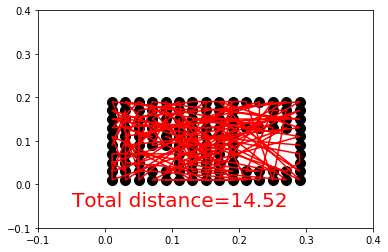

In [6]:



"""
Visualize Genetic Algorithm to find the shortest path for travel sales problem.

Visit tutorial website for more: https://morvanzhou.github.io/tutorials/
"""

#all was completed by morvanzhou. 

#Exceptions inlude the vector penalization fucntion: def vector_penalty_calcultion
# and input changes

#------------------------------------------------------------


import sys
sys.path.append("/home/joe/anaconda3/lib/python3.7/site-packages")

import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

from sklearn.preprocessing import normalize
from sklearn import preprocessing


N_CITIES = 126
CROSS_RATE = 0.2
MUTATE_RATE = 0.03
POP_SIZE = 400
N_GENERATIONS = 2#000
INPUT_FILE = "proj_test_1.tsp"

class TravelSalesPerson(object):
    def __init__(self, n_cities,file_name):
        
        cities = self.read_cities_file_Nx3(file_name)
        result_array = np.array([])
        
        #algorithm needs low numbers, shirnking map reduces relative distances. 
        Shrink_map = 100
        
        for i in range(len(cities)):
            result1 = cities[i][1]
            result2 = cities[i][2]
            result1 = np.float64(result1)/Shrink_map
            result2 = np.float64(result2)/Shrink_map
            result1 =np.append(result1, result2)         
            result_array = np.append(result_array, [[result1]])
            
        array2D_1 = result_array.reshape((len(cities),2))
        self.city_position = array2D_1
        plt.ion()
        
    
    def read_cities_file_Nx3(self,filename):

        with open(filename) as f:
            file_lines = f.readlines()

        pre_clip = len(file_lines)
        file_lines =file_lines[6:pre_clip-1] 
        post_clip = len(file_lines)

        for i in range (post_clip):
            file_lines[i] = file_lines[i].split()

        for i in range (post_clip):
            file_lines[i][0] = int(file_lines[i][0])
            file_lines[i][1] = int(file_lines[i][1])
            file_lines[i][2] = int(file_lines[i][2])

        return file_lines

    def plotting(self, lx, ly, total_d):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, "Total distance=%.2f" % total_d, fontdict={'size': 20, 'color': 'red'})
        plt.xlim((-0.1,.4))
        plt.ylim((-0.1,.4))
        plt.pause(0.01)
        
class GA(object):
    def __init__(self, DNA_size, cross_rate, mutation_rate, pop_size, ):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])

    def translateDNA(self, DNA, city_position):     # get cities' coord in order
        
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        
        return line_x, line_y
    

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

    def get_fitness(self, line_x, line_y):
        
        total_distance = np.empty((line_x.shape[0]), dtype=np.float64)
        
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
            
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        
        return fitness, total_distance        
                       
        
def sort_to_index(cities, index):
    
    #intilize list
    sorted_cities = []

    #initilze list size
    for i in range (len(index)):
        sorted_cities.append([0,0,0])

    #rearrange city index to optimum solution
    for i in range (len(index)):
        sorted_cities[i][0] = cities[index[i]-1][0]
        sorted_cities[i][1] = cities[index[i]-1][1]
        sorted_cities[i][2] = cities[index[i]-1][2]

    return sorted_cities
        
def vector_penalty_calcultion(individual, cities_file):

    x = read_cities_file_Nx3(cities_file)
    indv = []

    for i in range(len(individual)):
        indv.append(int(individual[i]))  
        
    sorted_cities = sort_to_index(x, indv)
    num_turns = 0

    for i in range(len(sorted_cities)-3):
        pt1 = [sorted_cities[i][1], sorted_cities[i][2]]
        pt2 = [sorted_cities[i+1][1], sorted_cities[i+1][2]]
        pt3 = [sorted_cities[i+2][1], sorted_cities[i+2][2]]

        v0 = np.array(pt1) - np.array(pt2)
        v1 = np.array(pt2) - np.array(pt3)

        angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
        num_turns = num_turns +1
        
        if ((np.degrees(angle) == 180.0) or (np.degrees(angle) == -180.0)):
            num_turns = num_turns -1
                   
    return num_turns

    
def read_cities_file_Nx3(filename):

        with open(filename) as f:
            lines = f.readlines()

        pre_clip = len(lines)
        lines =lines[6:pre_clip-1] 
        post_clip = len(lines)

        for i in range (post_clip):
            lines[i] = lines[i].split()

        for i in range (post_clip):
            lines[i][0] = int(lines[i][0])
            lines[i][1] = int(lines[i][1])
            lines[i][2] = int(lines[i][2])

        return lines
            
            
ga = GA(DNA_size=N_CITIES, cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)

env = TravelSalesPerson(N_CITIES, INPUT_FILE)

count = 1
for generation in range(N_GENERATIONS):
    
    lx, ly = ga.translateDNA(ga.pop, env.city_position)

    ##create a penalty array
    penalty_array = []
    penalty_regulator = 100
    
    for i in range(len(ga.pop)):
        penalty_array.append(vector_penalty_calcultion(ga.pop[i], INPUT_FILE)*penalty_regulator)

    fitness, total_distance = ga.get_fitness(lx, ly)

    #negate fitness for num turns
    penalized_fitness = []
    for i in range(len(fitness)):
        penalized_fitness.append(fitness[i]- penalty_array[i])

    ga.evolve(fitness)
    best_idx = np.argmax(penalized_fitness)
    
    if (count %1 == 0):
        print("penalty_array ", penalty_array)
        print('Gen:', generation, '| best fit: %.2f' % fitness[best_idx],)
        print("DIST ", total_distance[best_idx])
        env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])

    count= count +1

plt.ioff()
plt.show()